## IE 5374: Foundations of Data Analytics
## Project 3
## Group Members:
## 1) Neeraj Rangwani
## 2) Niral Desai
## 3) Deekshitha Prakash

# TASK 1

In [103]:
#Importing all the necessary libraries required for the project
import pandas as pd
import numpy as np
import string
import nltk 
import os
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import re
import networkx as nx

In [104]:
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk import bigrams
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
#Importing and reading the keywords dataset
df = pd.read_excel('/content/Keyword_data.xlsx')
df.head(5)

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
1,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
2,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
3,Managerialist and Human Capital Explanations f...,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
4,Bidding Wars Over R&D-Intensive Firms: Knowled...,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs


In [106]:
#Dataframe for all the keywords
df_key = df.iloc[:,1:]
df_key

,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
0,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
1,DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
2,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
3,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
4,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs
5,EMOTIONS (Psychology),INTERPERSONAL relations,STRESS (Psychology),SOCIAL interaction,SOCIAL psychology,EMPLOYEES -- Attitudes,CUSTOMER services,CUSTOMER satisfaction,JOB stress,PEER review (Professional performance),NaN,NaN
6,SUPERVISORS,JUSTICE,CONFLICT management,MEDIATION,EMPLOYEES,INDUSTRIAL relations,ORGANIZATIONAL behavior,UNITED States -- National Guard,ORGANIZATIONAL effectiveness,DECISION making,RESOURCE allocation,NaN
7,INDUSTRIAL relations,MANAGEMENT science,DECISION theory,ORGANIZATIONAL sociology,PUNCTUATED equilibrium (Evolution),ORGANIZATIONAL change,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,BUSINESS models,ORGANIZATIONAL research,NaN,NaN
8,DECISION making,EXECUTIVES,INDUSTRIAL management,NEW products,HIGH technology industries,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CORPORATE governance,INDUSTRIAL management,STOCKHOLDERS wealth,INSTITUTIONAL investors,WAGES,NEW products,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,DECENTRALIZATION in management,ORGANIZATIONAL effectiveness,NaN,NaN


In [107]:
#A loop to calculate all the unique keywords from the the dataframe
unique_list = []
for key1 in df_key:   #Key 1 for iterating over coumns
  for key2 in df_key[key1].dropna():  #key 2 for iterating over rows, dropping the nan values from the rows
    if key2 not in unique_list:
      unique_list.append(key2)  #appending the unique values in the list

In [108]:
#Finding the number of unique values in the list
len(unique_list)

248

In [109]:
#Defining an empty matrix of the size of unique keywords
matrix = np.zeros((len(unique_list), len(unique_list)), dtype = int)

In [110]:
#Converting the dataframe to a dictionary for creating the adjacency matrix keeping Title as Index
unique_dict = df.set_index('Title').T.to_dict('list')
unique_dict

{'Meta-Analyses of Financial Performance and Equity: Fusion or Confusion?': ['EQUITY',
  'ORGANIZATIONAL sociology',
  'PERFORMANCE',
  'META-analysis',
  'PSYCHOMETRICS',
  'ORGANIZATIONAL research',
  'FINANCIAL performance',
  'AGENCY theory',
  'ORGANIZATIONAL effectiveness',
  'ORGANIZATIONAL behavior',
  'CORPORATE governance',
  nan],
 'Home Country Environments, Corporate Diversification Strategies, and Firm Performance': ['DIVERSIFICATION in industry',
  'BUSINESS planning',
  'PERFORMANCE standards',
  'EMPLOYEES -- Rating of',
  'CORPORATE culture',
  'STRATEGIC planning',
  'ORGANIZATIONAL effectiveness',
  'MANAGEMENT science',
  'MANAGEMENT research',
  'PRODUCT management',
  nan,
  nan],
 'Safeguarding Investments in Asymmetric Interorganizational Relationships: Theory and Evidence': ['INTERORGANIZATIONAL relations',
  'INTERGROUP relations',
  'BUSINESS communication',
  'INVESTMENTS',
  'SUPPLY chains',
  'KNOWLEDGE management',
  'INTERORGANIZATIONAL networks',
  'CO

In [111]:
#Creating an adjacency matrix
for i in range(0, len(unique_list)):   
  for j in range(0, len(unique_list)):
    if i != j :
      if (matrix[i][j] == 0) and (matrix[j][i] == 0):
        for x in unique_dict.keys():
          if (unique_list[i] in (unique_dict[x])) and (unique_list[j] in (unique_dict[x])):
            matrix[i][j] = matrix[i][j] + 1
            matrix[j][i] = matrix[j][i] + 1 

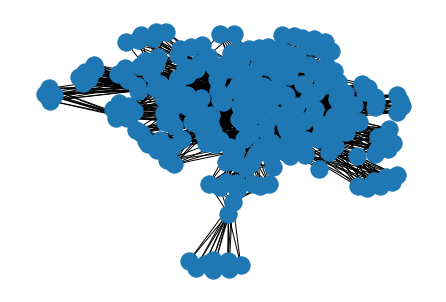

In [112]:
#Returning the graph from the matrix
network = nx.from_numpy_matrix(matrix, parallel_edges=False)
nx.draw(network)

In [113]:
#Function to calculate node degree
def node_degree(data):
  df_deg = pd.DataFrame(data, columns=['Nodes', 'Degree']) #Creating a dataframe with columns nodes and degress
  df_deg['Keywords'] = unique_list   #Assigning the keywords column to the list
  return df_deg

In [114]:
#Function to calculate node strength
def node_strength(data):
  df_str = pd.DataFrame(data, columns=['Nodes', 'Strength'])  #Creating a dataframe with columns nodes and degress
  df_str['Keywords'] = unique_list   #Assigning the keywords column to the list
  return df_str

In [115]:
#Function to add node pairs by weight
def add_weights(df_str, matrix):
  list_add = []          #Defining an empty list
  for i in range(0,len(unique_list)):
    for j in range(0,len(unique_list)):         #Looping through the list
      list_add.append([df_str['Keywords'][i], df_str['Keywords'][j], matrix[i][j]])
  df_new = pd.DataFrame(list_add, columns =['key1', 'key2', 'weight'], dtype = float)   
  return df_new

In [116]:
#Plotting a line chart between Degree and Strength
def plot(df_degree,df_strength):
  df_plot = pd.merge(df_degree,df_strength,how="inner",on=['Nodes'])
  df_plot = df_plot[['Degree','Strength']].groupby('Degree').mean().reset_index() 
  plt.plot(df_plot['Degree'], df_plot['Strength'])
  plt.xlabel('Degree')
  plt.ylabel('Strength')
  plt.title('Line chart between Degree and Strength')

In [117]:
#Creating a node degree dataframe and sorting in descending order according to Degree
df_degree =  node_degree(network.degree)
df_degree.sort_values(by = ['Degree'], ascending= False).head(10)

,Nodes,Degree,Keywords
23,23,166,ORGANIZATIONAL behavior
112,112,104,ORGANIZATIONAL effectiveness
16,16,102,MANAGEMENT science
20,20,93,PERSONNEL management
8,8,90,DECISION making
156,156,74,ORGANIZATIONAL structure
40,40,66,ORGANIZATIONAL sociology
88,88,66,STRATEGIC planning
47,47,64,INDUSTRIAL management
9,9,62,CORPORATE governance


In [118]:
#Creating a Strength degree dataframe and sorting in descending order according to Strength
df_str = node_strength(network.degree(weight='weight'))
df_str.sort_values(by = ['Strength'], ascending= False).head(10)

,Nodes,Strength,Keywords
23,23,265,ORGANIZATIONAL behavior
112,112,144,ORGANIZATIONAL effectiveness
16,16,136,MANAGEMENT science
20,20,126,PERSONNEL management
8,8,112,DECISION making
156,156,107,ORGANIZATIONAL structure
40,40,96,ORGANIZATIONAL sociology
9,9,85,CORPORATE governance
47,47,84,INDUSTRIAL management
88,88,80,STRATEGIC planning


In [119]:
#sorting the values according to the weight
dfw= add_weights(df_str, matrix)
dfw.sort_values(by = ['weight'], ascending= False).head(10)

<ipython-input-119-93e69ba01731>:2: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  dfw= add_weights(df_str, matrix)


,key1,key2,weight
5816,ORGANIZATIONAL behavior,ORGANIZATIONAL effectiveness,11.0
27799,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,11.0
5860,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,9.0
38711,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,9.0
5724,ORGANIZATIONAL behavior,PERSONNEL management,8.0
4983,PERSONNEL management,ORGANIZATIONAL behavior,8.0
3991,MANAGEMENT science,ORGANIZATIONAL behavior,7.0
5720,ORGANIZATIONAL behavior,MANAGEMENT science,7.0
2007,DECISION making,ORGANIZATIONAL behavior,6.0
5744,ORGANIZATIONAL behavior,ORGANIZATIONAL sociology,6.0


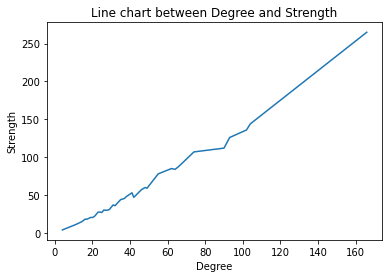

In [120]:
#Calling the line chart function
plot(df_degree, df_str)

# TASK 2

In [121]:
#Mounting the google drive on the colab
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
#Concatinating all the tweets
def concating_tweets(data):
  #Joining all the tweets
  tweets = ' '.join(data["tweet"])
  #Convering all the tweets to lowercase
  tweets = tweets.lower()
  #Removing the stopword
  tweets = ' '.join([word for word in tweets.split() if word not in (stopwords.words('english'))]) 
  tweets = re.sub(r'[^\w\s]', '', tweets)   
  return tweets

In [123]:
#Function for finding the freuqency
def calculating_freq(words):
  #Splitting the sentences into words
  word = words.split()
  #Most appeared words
  word = Counter(word).most_common()
  freq_words = pd.DataFrame(word, columns=['Word', 'Frequency'])
  return freq_words

In [124]:
#Gives ranks to all the frequency values
def calculating_rank_freq(df):
  df['rank'] = range(1,len(df)+1)  
  return df

In [125]:
#Function to make a histogram
def histogram_plot(df):
  plt.bar(df['Word'], df['Frequency'])
  plt.title('Words vs frequency for each year ')
  plt.show()

In [126]:
#Function to make a Loglog plot
def plotlog(data):
  plt.title('Loglog plot of Data')
  plt.loglog(data['Frequency'], data['rank'] ) 
  plt.show()

In [127]:
#Function for Bigram
def bigram(tweets):
  #Tokenizers for dividing the strings into a list of substrings
  tokens = nltk.word_tokenize(tweets)  
  bigrams = nltk.bigrams(tokens) 
  #gives you the frequency of words within a text 
  bigram_dist = nltk.FreqDist(bigrams)  
  #Top 100 most common words 
  bigram_df = pd.DataFrame(bigram_dist.most_common(100),columns=['Bigram', 'Count'])

  #Converting the dataframe to a dictionary
  dict_d = bigram_df.set_index('Bigram').T.to_dict('records') 

  #Creating a network plot 
  Gr = nx.DiGraph()

  #Creating the connections in between the nodes
  for key, value in dict_d[0].items():
    Gr.add_edge(key[0], key[1], weight=(value))

  fig, ax = plt.subplots(figsize=(12, 10))
  pos = nx.spring_layout(Gr, k=5)

  #for nodes
  nx.draw_networkx_nodes(Gr, pos)

  #for edges
  nx.draw_networkx_edges(Gr, pos)
 
  #labels for node
  nx.draw_networkx_labels(Gr, pos, font_size=4)
  ax = plt.gca()
  plt.show()

     Word  Frequency
0   tesla        305
1     amp        212
2   model        208
3    good        171
4  rocket        149
5    like        137
6     yes        132
7  spacex        124
8  launch        112
9    next        103


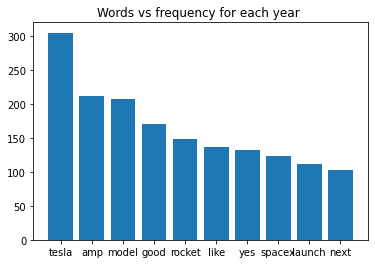

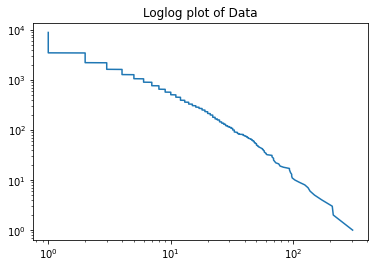

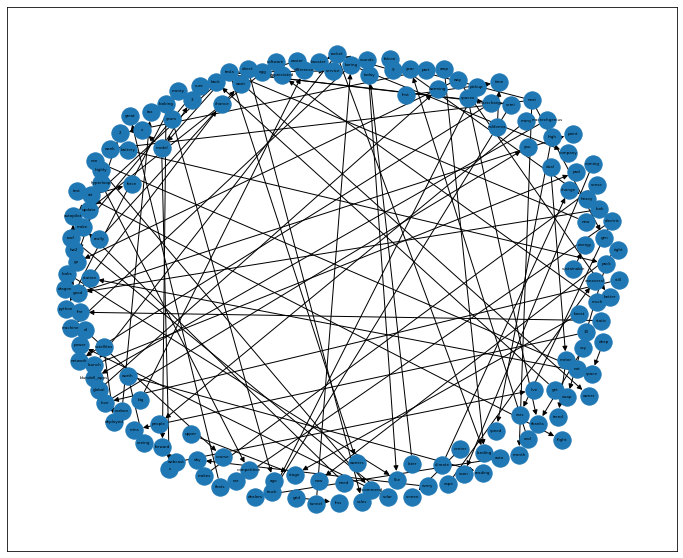

In [128]:
#Plotting the graphs for the year 2017
dir='/content/drive/MyDrive/Classroom/Project 3_ Data/2017.csv'
df = pd.read_csv(dir)
twts = concating_tweets(df)
dffreq = calculating_freq(twts)
print(dffreq.head(10))
histogram_plot(dffreq.head(10))
plotlog(calculating_rank_freq(dffreq))
bigram(twts)

     Word  Frequency
0     amp        524
1   tesla        447
2     car        119
3     yes        107
4       3        102
5    good        102
6   model         98
7     its         95
8    like         94
9  spacex         88


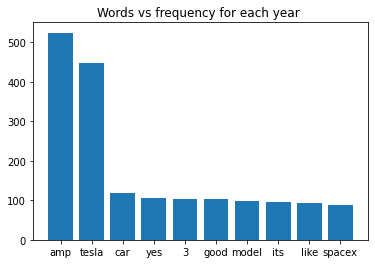

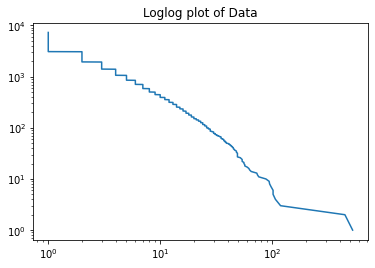

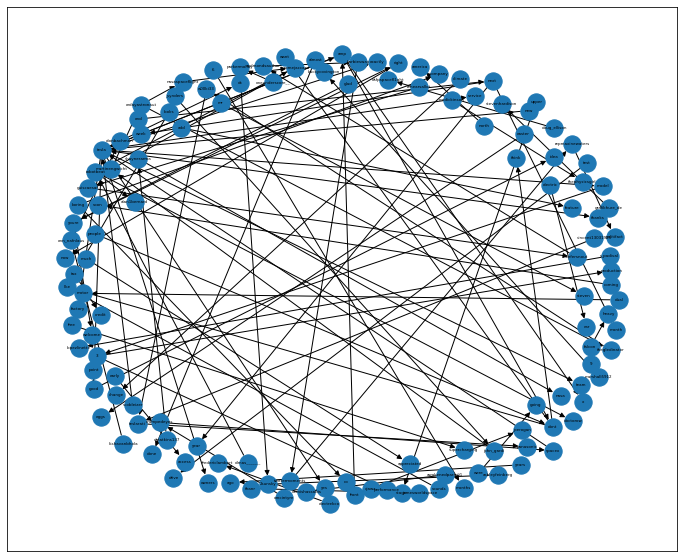

In [129]:
#Plotting the graphs for the year 2018
dir='/content/drive/MyDrive/Classroom/Project 3_ Data/2018.csv'
df = pd.read_csv(dir)
twts = concating_tweets(df)
dffreq = calculating_freq(twts)
print(dffreq.head(10))
histogram_plot(dffreq.head(10))
plotlog(calculating_rank_freq(dffreq))
bigram(twts)

             Word  Frequency
0           tesla       1310
1             amp       1204
2          spacex        425
3             yes        392
4           model        373
5            good        358
6            like        314
7  erdayastronaut        300
8             car        282
9           would        270


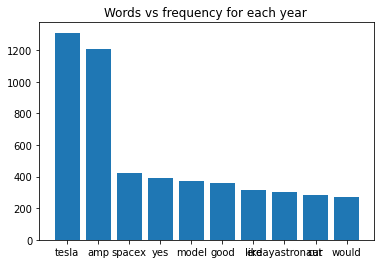

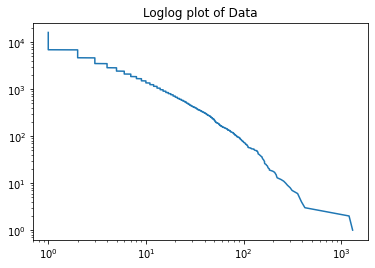

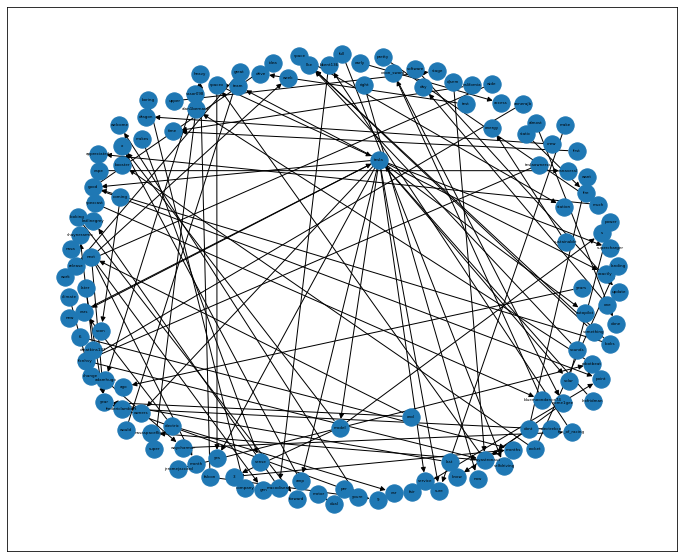

In [130]:
#Plotting the graphs for the year 2019
dir='/content/drive/MyDrive/Classroom/Project 3_ Data/2019.csv'
df = pd.read_csv(dir)
twts = concating_tweets(df)
dffreq = calculating_freq(twts)
print(dffreq.head(10))
histogram_plot(dffreq.head(10))
plotlog(calculating_rank_freq(dffreq))
bigram(twts)

             Word  Frequency
0             amp       1804
1           tesla       1673
2          spacex        632
3  erdayastronaut        561
4             yes        553
5            good        471
6         flcnhvy        424
7           model        403
8            like        392
9           great        370


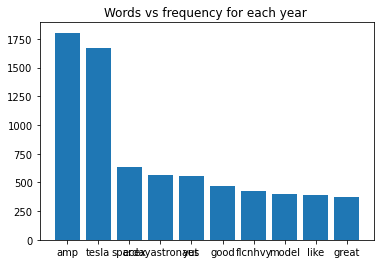

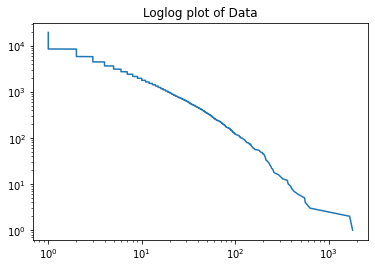

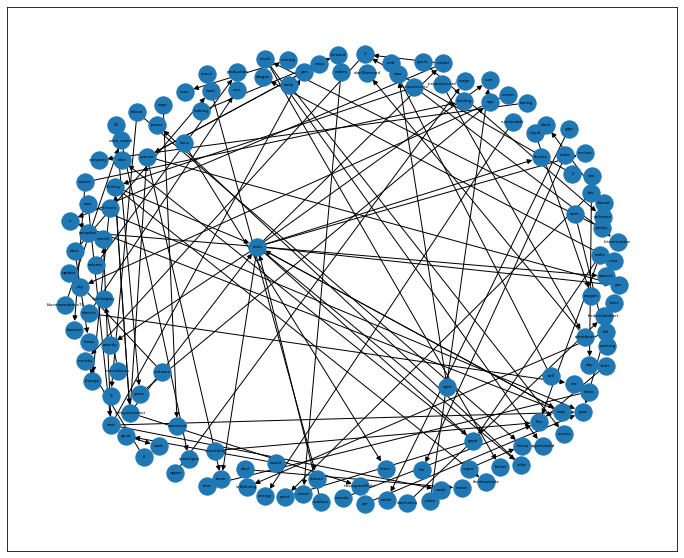

In [131]:
#Plotting the graphs for the year 2020
dir='/content/drive/MyDrive/Classroom/Project 3_ Data/2020.csv'
df = pd.read_csv(dir)
twts = concating_tweets(df)
dffreq = calculating_freq(twts)
print(dffreq.head(10))
histogram_plot(dffreq.head(10))
plotlog(calculating_rank_freq(dffreq))
bigram(twts)

             Word  Frequency
0             amp        473
1           tesla        322
2          spacex        234
3   wholemarsblog        189
4   teslaownerssv        119
5        ppathole        116
6  erdayastronaut        111
7           great        102
8            good         98
9            much         93


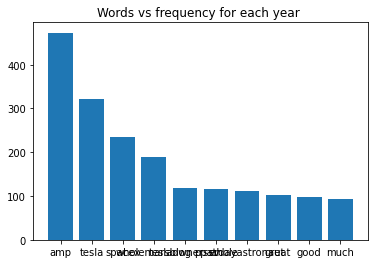

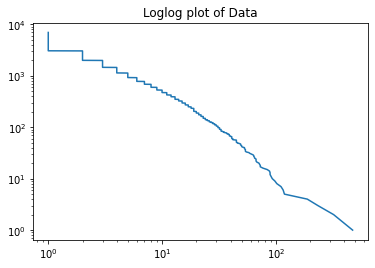

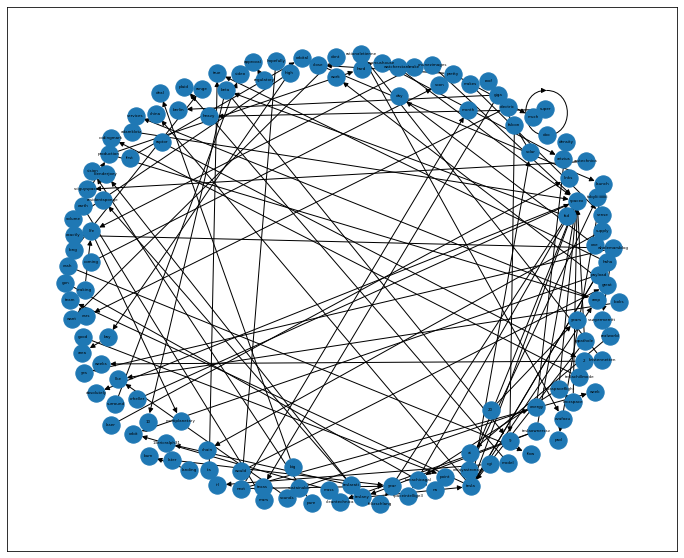

In [132]:
#Plotting the graphs for the year 2021
dir='/content/drive/MyDrive/Classroom/Project 3_ Data/2021.csv'
df = pd.read_csv(dir)
twts = concating_tweets(df)
dffreq = calculating_freq(twts)
print(dffreq.head(10))
histogram_plot(dffreq.head(10))
plotlog(calculating_rank_freq(dffreq))
bigram(twts)

            Word  Frequency
0          tesla        108
1  wholemarsblog         84
2            amp         80
3         spacex         56
4  teslaownerssv         50
5  sawyermerritt         36
6         people         34
7            yes         32
8          would         30
9            one         30


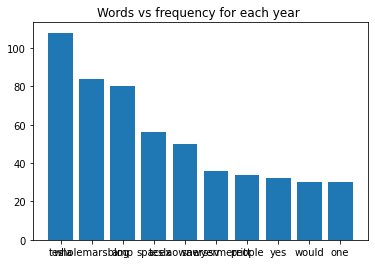

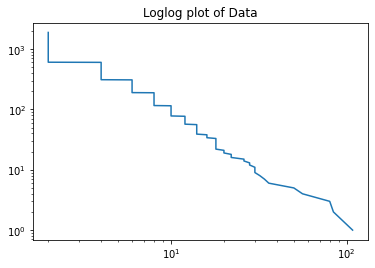

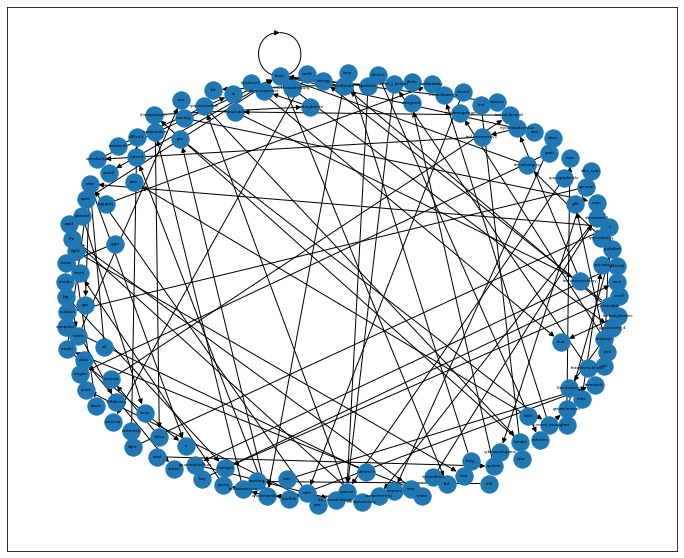

In [133]:
##Plotting the graphs for the year 2022
dir='/content/drive/MyDrive/Classroom/Project 3_ Data/2022.csv'
df = pd.read_csv(dir)
twts = concating_tweets(df)
dffreq = calculating_freq(twts)
print(dffreq.head(10))
histogram_plot(dffreq.head(10))
plotlog(calculating_rank_freq(dffreq))
bigram(twts)